In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 7.0MB 419kB/s ta 0:00:012     |▋                               | 133kB 238kB/s eta 0:00:29     |█▊                              | 378kB 686kB/s eta 0:00:10     |███▍                            | 747kB 686kB/s eta 0:00:10     |███████▎                        | 1.6MB 361kB/s eta 0:00:15     |█████████████████████████▊      | 5.6MB 681kB/s eta 0:00:02     |████████████████████████████▎   | 6.2MB 651kB/s eta 0:00:02
  Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
print(sklearn.__version__)

0.22.1


In [5]:
advertising_data = pd.read_csv('dataset/Advertising.csv', index_col=0)
advertising_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
advertising_data.shape

(200, 4)

In [9]:
advertising_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


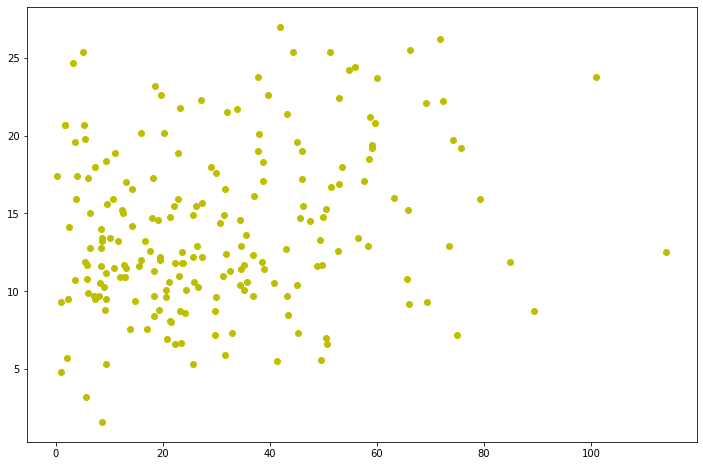

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(advertising_data['newspaper'], advertising_data['sales'], c='y' )
plt.show()

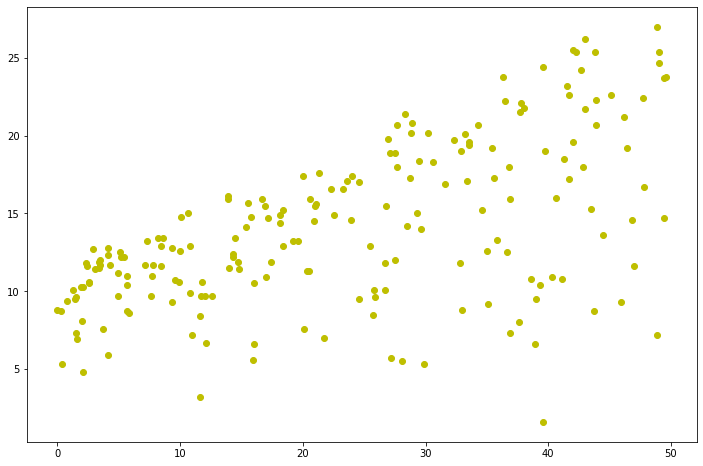

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(advertising_data['radio'], advertising_data['sales'], c='y' )
plt.show()

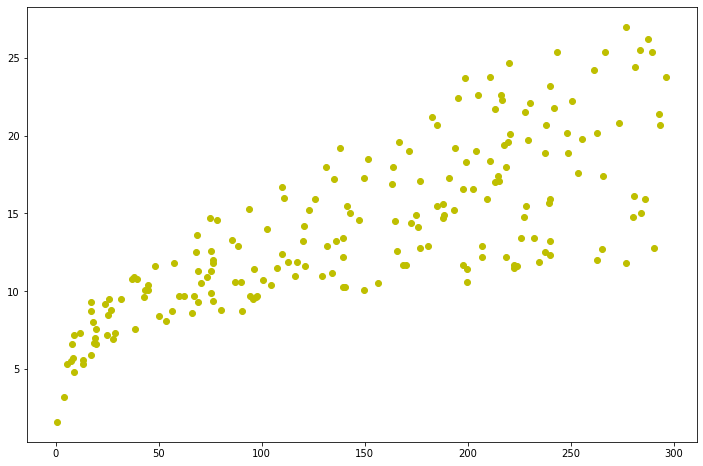

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(advertising_data['TV'], advertising_data['sales'], c='y' )
plt.show()

In [16]:
advertising_data_corr = advertising_data.corr()
advertising_data_corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


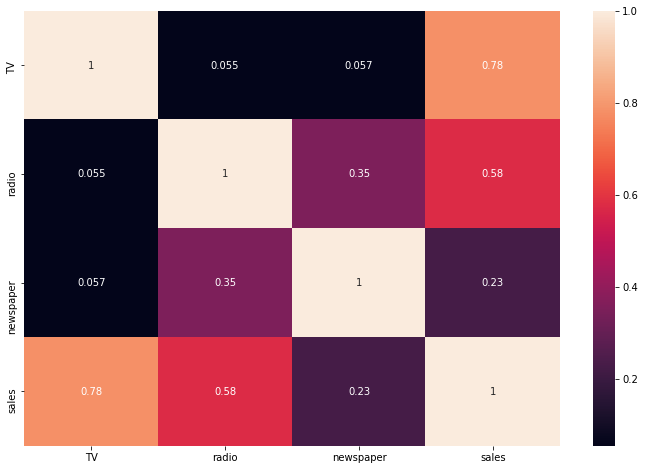

In [19]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(advertising_data_corr, annot = True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
x = advertising_data['TV'].values.reshape(-1, 1)
y = advertising_data['sales'].values.reshape(-1, 1)
y.shape

(200, 1)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
x_train.shape, y_train.shape

((140, 1), (140, 1))

In [27]:
x_test.shape, y_test.shape

((60, 1), (60, 1))

In [31]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sun, 05 Jan 2020   Prob (F-statistic):           4.76e-26
Time:                        16:46:06   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.0

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True).fit(x_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
print('Training Score :', model.score(x_train, y_train))

Training Score : 0.5552336104251212


In [34]:
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score

print('Testing Score :', r2_score(y_test, y_pred))

Testing Score : 0.725606346597073


In [36]:
def adjusted_r2(r_square, labels, features):
    adj_r_square = 1-((1-r_square) * (len(labels) -1)) / (len(labels) - features.shape[1])
    return adj_r_square

In [37]:
print('Adjusted R Square :', adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted R Square : 0.725606346597073


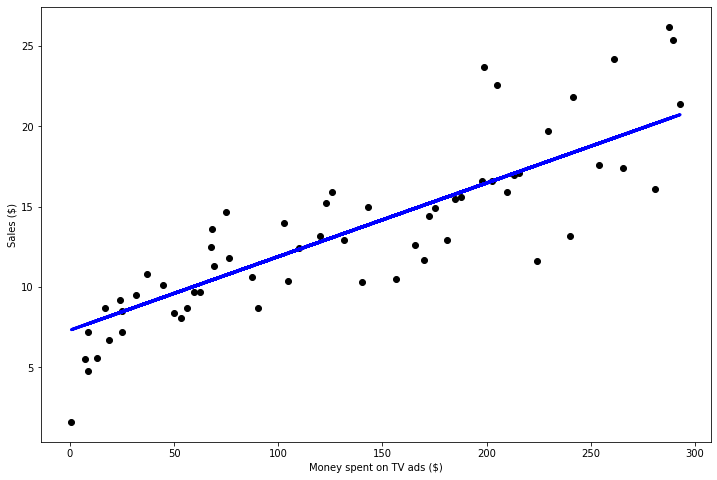

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(x_test, y_test, c='black')
plt.plot(x_test, y_pred, c='blue', linewidth=3)
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales ($)')
plt.show()

In [41]:
x = advertising_data.drop(['sales'], axis=1)
y = advertising_data['sales']

In [42]:
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [43]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [48]:
x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)
model_fit = stats_model.fit()
print('Summary :', model_fit.summary())

Summary :                             OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     439.9
Date:                Sun, 05 Jan 2020   Prob (F-statistic):           8.76e-70
Time:                        17:14:07   Log-Likelihood:                -262.41
No. Observations:                 140   AIC:                             532.8
Df Residuals:                     136   BIC:                             544.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8803      0.360      7.99

In [49]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training Score :', linear_model.score(x_train, y_train))

Training Score : 0.9065727532450597


In [50]:
y_pred = linear_model.predict(x_test)
print('Testing Score :', r2_score(y_test, y_pred))

Testing Score : 0.8649018906637793


In [51]:
print('Adjusted R2 Score :', adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted R2 Score : 0.8601616061256663
